In [1]:
import numpy as np
from aemulus_heft.heft_emu import HEFTEmulator
#from aemulus_heft.utils import lpt_spectra

emu = HEFTEmulator()
cosmo = [0.0223, 0.12, -1, 0.97, 2.1, 67, 0.06]
k = np.logspace(-2, np.log10(0.9), 100)
z=0

#first need 1-loop predictions
#spec_lpt, sigma8z = lpt_spectra(k, z, cosmo)
#cosmo.append(sigma8z)

#spec_heft = emu.predict(k, np.array(cosmo), spec_lpt)

In [2]:
from aemulus_heft.heft_emu import NNHEFTEmulator
from scipy.interpolate import interp1d
# (ombh2, omch2, w0, ns, 10^9 As, H0, mnu, z)
cosmo = [0.0223, 0.12, -1, 0.97, 2.1, 67, 0.06, 0]
nnemu = NNHEFTEmulator()
k_nn, spec_heft_nn = nnemu.predict(np.atleast_2d(cosmo))

k = np.logspace(-2, np.log10(0.9), 100)
spec_heft_nn= interp1d(k_nn, spec_heft_nn, kind='cubic', fill_value='extrapolate')(k)

In [12]:
P_SN = 1755

bvec = [0.786, 0.583, -0.406, -0.512, P_SN]
bvec_noSN = [0.786, 0.583, -0.406, -0.512, 0.0]

P_gg = emu.basis_to_full(k, bvec, spec_heft_nn, cross=False)
P_gg_noSN = emu.basis_to_full(k, bvec_noSN, spec_heft_nn, cross=False)
#P_gm = emu.basis_to_full(k, bvec, spec_heft_nn)
P_mm = spec_heft_nn[0,:]

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

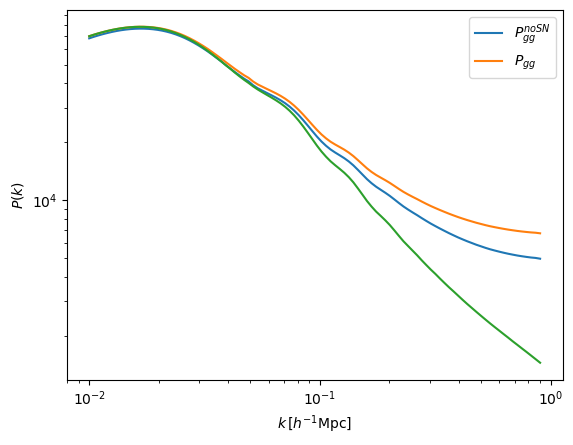

In [26]:
#plt.loglog(k, P_mm)
#plt.loglog(k, P_gm)
plt.loglog(k, P_gg_noSN)
plt.loglog(k, P_gg)
plt.loglog(k, 5.33*bvec[0]**2*P_mm[0])

#plt.loglog(k,P_gg_noSN + P_SN)

plt.xlabel(r'$k\, [h^{-1} \rm Mpc]$')
plt.ylabel(r'$P(k)$') 
plt.legend([r'$P^{noSN}_{gg}$', r'$P_{gg}$'])

plt.show()